In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-40y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
2,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
3,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China


In [3]:
print(df.Sport.value_counts())

Athletics                    14049
Swimming                      9775
Gymnastics                    6393
Cross Country Skiing          3809
Cycling                       3776
Shooting                      3451
Rowing                        3403
Biathlon                      3044
Alpine Skiing                 3027
Canoeing                      2750
Football                      2613
Sailing                       2394
Judo                          2328
Ice Hockey                    2199
Hockey                        2186
Wrestling                     2085
Fencing                       2083
Equestrianism                 2054
Handball                      1994
Boxing                        1791
Speed Skating                 1780
Basketball                    1712
Volleyball                    1690
Tennis                        1572
Weightlifting                 1497
Table Tennis                  1461
Water Polo                    1410
Archery                       1230
Short Track Speed Sk

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


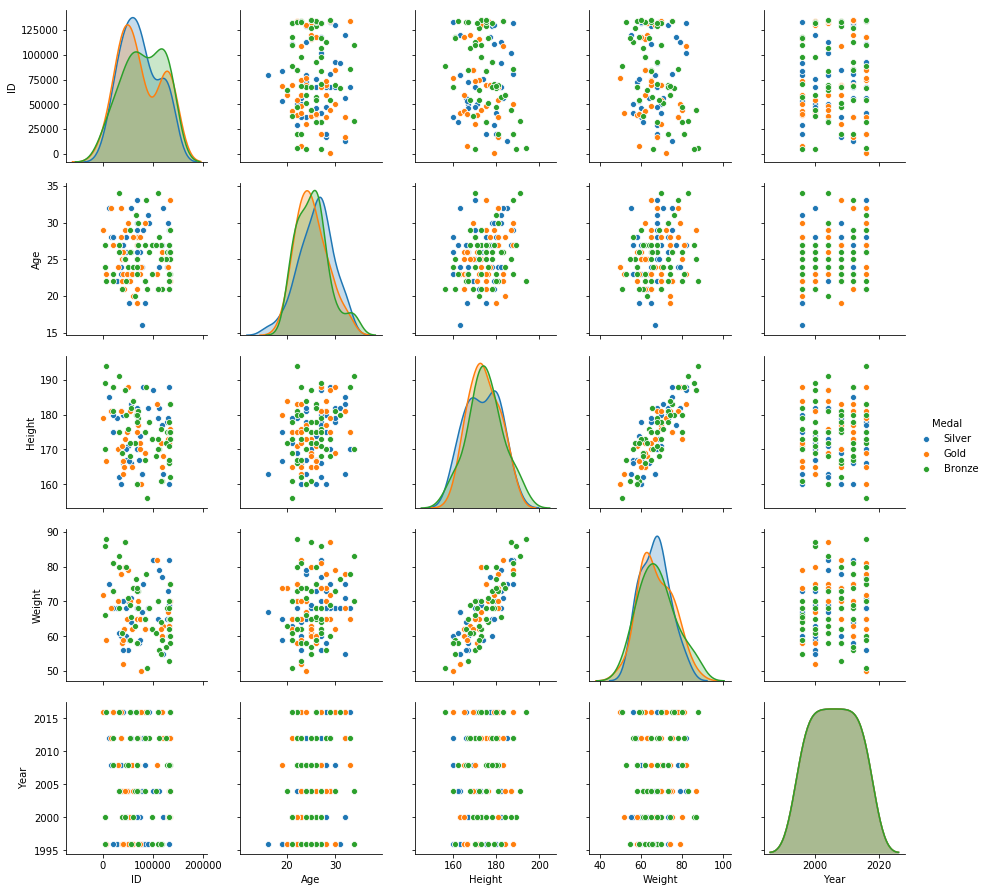

In [4]:
df2 = df.loc[(df.Sport=='Badminton') & (df.Medal!='None')]
sb.pairplot(df2, hue='Medal')

In [5]:
df = df2

x = df[['Height', 'Weight']].values
y = df['Medal'].values

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

print(x_std[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 0.85855701  0.06022808]
 [ 0.85855701  0.06022808]
 [ 0.85855701  0.68509542]
 [ 1.76218114  1.68488316]
 [ 1.76218114  1.68488316]
 [ 0.60037869  0.06022808]
 [-0.56142376  0.31017502]
 [ 0.85855701  1.30996276]
 [ 0.85855701  1.30996276]
 [ 0.85855701  1.30996276]]
[2 1 0 0 1 2 1 2 1 1]


In [6]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Accuracy: 0.273


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


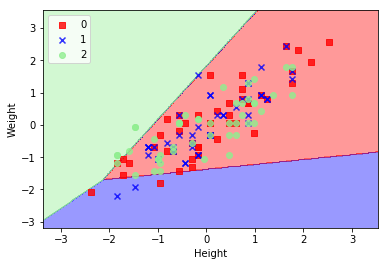

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.273


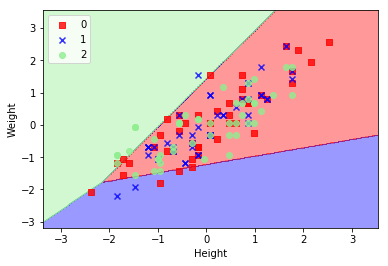

In [8]:
lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.273


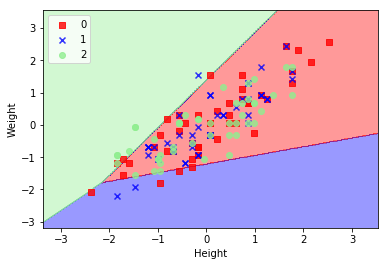

In [9]:
lr = LogisticRegression(C=50.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.273


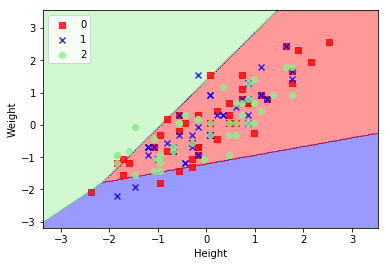

In [10]:
lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.273


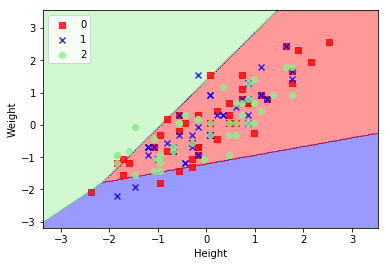

In [11]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

In [12]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[1 28.0 181.0 68.0 0 2008 0 2 0 0]
 [1 32.0 181.0 68.0 0 2012 0 3 0 0]
 [1 22.0 181.0 73.0 0 2008 0 2 0 1]
 [1 23.0 188.0 81.0 0 2012 0 3 0 1]
 [1 27.0 188.0 81.0 0 2016 0 4 0 1]
 [1 22.0 179.0 68.0 0 1996 0 1 0 1]
 [0 24.0 170.0 70.0 0 2008 0 2 0 3]
 [1 24.0 181.0 78.0 0 2008 0 2 0 0]
 [1 28.0 181.0 78.0 0 2012 0 3 0 0]
 [1 32.0 181.0 78.0 0 2016 0 4 0 0]]
[2 1 0 0 1 2 1 2 1 1]


In [13]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.295


In [14]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

ley = LabelEncoder()   
y = ley.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

print(x_train[:10])
print(y_train[:10])

[[-1.         -1.03142778 -0.69051292 -0.68961272  0.24519931  0.29277002
   0.         -0.29277002  0.          0.09166985]
 [ 1.         -0.44552797  0.85855701  1.30996276 -1.01582569  0.29277002
   0.         -0.29277002  0.         -1.37504775]
 [ 1.         -1.03142778  0.60037869  0.06022808 -1.01582569 -1.46385011
   0.         -0.87831007  0.         -0.64168895]
 [ 1.         -0.73847788  1.76218114  1.68488316 -1.01582569  0.87831007
   0.          0.29277002  0.         -0.64168895]
 [ 1.          1.60512133  0.72946785  1.10023633 -0.07005694  1.46385011
   0.          0.87831007  0.         -1.37504775]
 [ 1.         -1.61732758  1.2458245   0.81006889  1.19096805 -1.46385011
   0.         -0.87831007  0.          0.09166985]
 [ 1.         -0.44552797  0.21311121  0.43514849  1.19096805  0.29277002
   0.         -0.29277002  0.         -1.37504775]
 [ 1.         -1.03142778  2.53671611  2.55969743 -0.70056944  1.46385011
   0.          0.87831007  0.         -0.64168895]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
%%time
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.341
CPU times: user 4.65 ms, sys: 2.64 ms, total: 7.3 ms
Wall time: 2.13 ms


In [16]:
%%time
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.364
CPU times: user 16.9 ms, sys: 5.48 ms, total: 22.4 ms
Wall time: 15.2 ms


In [17]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.364
CPU times: user 91.3 ms, sys: 3.33 ms, total: 94.6 ms
Wall time: 92.5 ms


In [18]:
%%time
lr = LogisticRegression(solver='saga')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.364
CPU times: user 5.48 ms, sys: 1.94 ms, total: 7.42 ms
Wall time: 5.7 ms


In [19]:
%%time
lr = LogisticRegression(max_iter=100, solver='saga', penalty='l1')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.341
CPU times: user 5.69 ms, sys: 1.89 ms, total: 7.58 ms
Wall time: 6.03 ms


In [20]:
%%time
lr = LogisticRegression(solver='sag')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.364
CPU times: user 5.25 ms, sys: 1.99 ms, total: 7.24 ms
Wall time: 5.52 ms


In [21]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)

c = np.array([0.1, 1, 10, 100])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_solver,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,newton-cg,0.009073,0.000216,0.496528,0.236111,11
1,0.1,lbfgs,0.004750,0.000180,0.496528,0.236111,11
2,0.1,liblinear,0.000512,0.000167,0.493056,0.236111,11
3,0.1,sag,0.002090,0.000178,0.496528,0.236111,11
4,0.1,saga,0.002153,0.000178,0.496528,0.236111,11
5,1,newton-cg,0.009671,0.000164,0.520833,0.236111,11
6,1,lbfgs,0.005901,0.000176,0.520833,0.236111,11
7,1,liblinear,0.000591,0.000169,0.517361,0.229167,20
8,1,sag,0.002846,0.000173,0.520833,0.236111,11
9,1,saga,0.002719,0.000172,0.520833,0.236111,11


In [22]:
df = pd.read_csv('prepd-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.61549745 -0.25245155  0.42402653  0.6507647  -1.06542753  0.45633602
  -0.4675028  -1.19092679 -1.06341198 -0.98195753]
 [ 0.61549745 -0.41153166 -0.61940473 -0.88757195 -1.06542753  1.12558717
  -0.4675028  -0.19382838  0.17381329  0.15427521]
 [ 0.61549745 -0.57061176  0.63271279  0.26618054 -1.06542753  0.72403648
  -0.4675028   1.55109383 -0.80565672 -0.83396083]
 [ 0.61549745 -0.09337144 -1.66283599 -0.73373829 -1.06542753  0.85788671
  -0.4675028  -1.35710986  1.87499803  1.83475388]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.45282691]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.47669734]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.1950262 ]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.17592985]
 [

In [23]:
grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:422: LineSearchWarning: Rounding errors prevent the line se

KeyboardInterrupt: 